# Computer Graphics
## Line-Plane Intersection
A plane in 3D may be represented by a normal vector $\boldsymbol{N}$ and a point $\boldsymbol{P}_0$ on the plane:
<br> $N\cdot(P-P_0)=0$
<br>A line may be defined in *parametric form* by its two endpoints $P_1$ and $P_2$:
<br> $P(t)=P_1+t(P_2-P_1)$, $t\in R$
<br> Where $t$ is the *parameter* of the line. If we keep $t\in[0,1]$, then we have a line segment between points $P_1$ and $P_2$.
<br>We can find the intersection of a line and a plane by finding the parameter $t$ for which the point on line is also a point on the plane:
<br>$\Large t=\frac{N\cdot(P_0-P_1)}{N\cdot(P_2-P_1)}$
<br>**Hint:** If $N\cdot(P_2-P_1)\ne0$, then we have one intersection. Otherwise, there is no intersection or infinite intersections (the line is parallel to the plane).
<br>The formulas for line-plane intersection are expressed in the **Pinterest** page mentioned below.
<br><br>**Contents**
 - Importing required libraries
 - Defining the class **Line** which includes a *method* to compute the intersection of the line with a given plane
 - Example, showing the intersection of some lines with a plane
    
<br>by Hamed Shah-Hosseini, Twitter:@chekaad, Instagram:@ostad.ai, YouTube: @ostad-ai
<br>https://github.com/ostad-ai/Computer-Graphics
<br>Explanation in **English**:
    https://www.pinterest.com/HamedShahHosseini/Computer-Graphics

In [1]:
# importing required modules
import random
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# a line between two endpoints p1 and p2
# p1 and p2 are expressed by tuple (x,y,z) or list [x,y,z]
class Line:
    def __init__(self,p1,p2,eps=.001):
        self.p1=np.asarray(p1) 
        self.p2=np.asarray(p2)
        self.eps=eps
        # finds intersection of this line to the plane
    def intersect(self,N,p0): #parameters of the plane
        N_np=np.asarray(N)
        p0_np=np.asarray(p0)
        denom=N_np.dot(self.p2-self.p1)        
        if abs(denom)<self.eps: # line and plane are prallel
            return np.array([])
        nomi=N_np.dot(p0_np-self.p1)
        t=nomi/denom
        intersection=self.p1+t*(self.p2-self.p1)
        return intersection

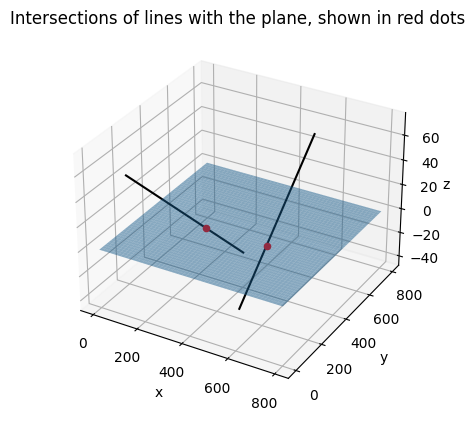

In [4]:
# example of intersection of lines with a plane
SIZE=800
lines=[]  #holds the lines
inters=[] # holds the intersection points

# parameters of the plane with normal vector N and a point p0 on it
N,p0=[0,0,1],[0,0,0]

# define the lines
lines.append(Line((100,50,60),(350,490,-30)))
lines.append(Line((600,600,70),(500,200,-40)))

# finding intersection points between the lines and the plane
for i in range(len(lines)):        
            inter=lines[i].intersect(N,p0)
            if inter.any():
                inters.append(inter)

# getting the axis
ax=plt.subplot(111,projection='3d')

# displaying the lines
for line in lines:
    ax.plot([line.p1[0],line.p2[0]],[line.p1[1],line.p2[1]],
            [line.p1[2],line.p2[2]],c='k')

# displaying the plane
xs,ys=np.meshgrid(range(SIZE),range(SIZE))
D=-N[0]*p0[0]-N[1]*p0[1]-N[2]*p0[2]
zs=(-D-N[0]*xs-N[1]*ys)/N[2]

ax.plot_surface(xs,ys,zs,alpha=.5)

# displaying the intersection points
for inter in inters:
    ax.scatter(inter[0],inter[1],inter[2],c='red')
    
# displaying axis labels and title
ax.set_xlabel('x');ax.set_ylabel('y')
ax.set_zlabel('z'); ax.zaxis.labelpad=-1.2
plt.title('Intersections of lines with the plane, shown in red dots')
plt.show()